# Data 550 Project 2
### Names: Connor Fairbanks, Graham Kerford

### Description of the Data

The 'basketball players stats per season-49 leagues' dataset was used for this project. It comprises player data for 49 leagues from the year 1999 to present for each season. The dataset was downlaoded from [kaggle](https://www.kaggle.com/mirichoi0218/insurance/home) in January, 2020 and is available at: [https://www.kaggle.com/jacobbaruch/basketball-players-stats-per-season-49-leagues](https://www.kaggle.com/jacobbaruch/basketball-players-stats-per-season-49-leagues). In total ~11 thousand player's data was collected in 49 leagues. Due to the large amount of data available, the dataset used for this project was limited to players who played in more than 60 out of the possible 82 regular season games in only one league (the NBA). We omitted statistics from playoff games for this analysis. If a player played in more than 60 games in a season, it means they had close to a full season and did not miss an inordinate amount of games due to injury. The dataset contains the following characteristics for each player:

- `League`: The league that the players played in for the specified season, limited to the NBA for this analysis.

- `Season`: Date of the NBA season (by year).

- `Stage`: The period in the season during which the data was taken.

- `Player`: The name of the player.

- `Team`: The team the player played for during the season.

- `GP`: Games played during the season. 

- `MIN`: Minutes played.

- `FGM`: Field goals made.

- `FGA`: Field goals attempts.

- `3PM`: 3 pointers made.

- `3PA`: 3 point attempts.

- `FTM`: Free throws made.

- `FTA`: Free throws attempts.

- `TOV`: Turnovers

- `PF`: Personal fouls

- `ORB`: Offensive rebounds

- `DRB`: Defensive rebounds

- `REB`: Total rebounds

- `AST`: Assists

- `STL`: Steals

- `BLK`: Blocks

- `PTS`: Points

- `Birth_year`: Year of birth

- `Birth_month`: Month of birth

- `Birth_date`: Birthdate

- `height`: (feet - inches)

- `height`: (cm)

- `weight`: Weight in pounds

- `weight_kg`: Weight in kilograms

- `nationality`: Nationality of the player at birth

- `high_school`: High school attended

- `draft_round`: Draft hound

- `draft_pick`: Draft pick

- `draft_team`: Team drafted to

In [262]:
# Load necessary libraries
library(dplyr) 
library(ggplot2)
library(tibble)
library(tidyverse)
library(plotly)
library(gapminder)
library(GGally)
library(ggrepel)

# Set global theme
my_theme <- theme_bw() +
  theme(
    text = element_text(size = 12),
    panel.border = element_rect(colour = 'grey80'), 
    panel.grid.minor = element_blank(), 
    axis.title.x = element_text(margin = margin(t=10)),
    axis.title.y = element_text(margin = margin(r=10))
  )
theme_set(my_theme)

Warning message:
"package 'ggrepel' was built under R version 4.0.3"


### Read in the data: 

In [69]:
basketball_df <- read.csv('players_stats_by_season_full_details.csv')
read.csv

function (file, header = TRUE, sep = ",", quote = "\"", dec = ".", 
    fill = TRUE, comment.char = "", ...) 
read.table(file = file, header = header, sep = sep, quote = quote, 
    dec = dec, fill = fill, comment.char = comment.char, ...)
<bytecode: 0x0000000013c5a528>
<environment: namespace:utils>

#### Filter the data to a more manageable size as mentioned in the description above: 

In [70]:
names(basketball_df)[1] <- 'League'
NBA_data_filtered <- filter(basketball_df, Stage == 'Regular_Season' & League == 'NBA' & GP >60)

### Exploration of the data and initial thoughts

First we will look at some summary statistics and the types of data in each column.

In [71]:
summary(NBA_data_filtered)

    League             Season             Stage              Player         
 Length:4245        Length:4245        Length:4245        Length:4245       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
     Team                 GP             MIN              FGM       
 Length:4245        Min.   :61.00   Min.   : 266.8   Min.   : 17.0  
 Class :character   1st Qu.:71.00   1st Qu.:1549.7   1st Qu.:198.0  
 Mode  :character   Median :76.00   Median :2029.0   Median :290.0  
                    Mean   :75.08   Mean   :2016.8   Mean   :321.3  
                    3rd Qu.:80.00   3rd


Next we will look at the first few rows of the table to get an idea of what it looks like. 


In [72]:
head(NBA_data_filtered)

,League,Season,Stage,Player,Team,GP,MIN,FGM,FGA,X3PM,...,birth_date,height,height_cm,weight,weight_kg,nationality,high_school,draft_round,draft_pick,draft_team
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,...,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<chr>
1,NBA,1999 - 2000,Regular_Season,Shaquille O'Neal,LAL,79,3163,956,1665,0,...,"Mar 6, 1972",7-1,216,325,147,United States,Robert G. Cole High School,1,1,Orlando Magic
2,NBA,1999 - 2000,Regular_Season,Vince Carter,TOR,82,3126,788,1696,95,...,"Jan 26, 1977",6-6,198,220,100,United States,Mainland High School,1,5,Golden State Warriors
3,NBA,1999 - 2000,Regular_Season,Karl Malone,UTA,82,2947,752,1476,2,...,"Jul 24, 1963",6-9,206,265,120,United States,Summerfield High School,1,13,Utah Jazz
4,NBA,1999 - 2000,Regular_Season,Allen Iverson,PHI,70,2853,729,1733,89,...,"Jun 7, 1975",6-0,183,165,75,United States,Bethel High School,1,1,Philadelphia Sixers
5,NBA,1999 - 2000,Regular_Season,Gary Payton,SEA,82,3425,747,1666,177,...,"Jul 23, 1968",6-4,193,180,82,United States,Skyline High School,1,2,Seattle SuperSonics
6,NBA,1999 - 2000,Regular_Season,Jerry Stackhouse,DET,82,3148,619,1447,83,...,"Nov 5, 1974",6-6,198,218,99,United States,Oak Hill Academy,1,3,Philadelphia Sixers



We will perform part of our analysis on the nationality of NBA players, so we will first explore what the unqiue values are in that column. 


In [73]:
unique(NBA_data_filtered$nationality)

[1] "United States"                                   
 [2] "Germany"                                         
 [3] "Netherlands"                                     
 [4] "Serbia"                                          
 [5] "Democratic Republic of the Congo"                
 [6] "United States / Jamaica"                         
 [7] "Serbia / Greece"                                 
 [8] "United States / Spain"                           
 [9] "Nigeria / England"                               
[10] "Lithuania"                                       
[11] "Ukraine"                                         
[12] "United States / Germany"                         
[13] "Germany / United States"                         
[14] "Canada / Bahamas"                                
[15] "Slovenia"                                        
[16] "Australia"                                       
[17] "Haiti"                                           
[18] "Saint Vincent and the Grenadines / United States"
[19] "Canada / South Africa"                           
[20] "Dominican Republic"                              
[21] "Turkey"                                          
[22] "Canada"                                          
[23] "Finland"                                         
[24] "Spain"                                           
[25] "Russia"                                          
[26] "France"                                          
[27] "Mexico"                                          
[28] "China"                                           
[29] "Croatia"                                         
[30] "Brazil"                                          
[31] "Montenegro"                                      
[32] "Argentina"                                       
[33] "Georgia"                                         
[34] "United States / Norway"                          
[35] "Senegal"                                         
[36] "Puerto Rico / United States"                     
[37] "Czech Republic"                                  
[38] "United States / Qatar"                           
[39] "Canada / Haiti"                                  
[40] "Netherlands / United States"                     
[41] "England / United States"                         
[42] "England / South Sudan"                           
[43] "United States / Dominican Republic"              
[44] "Netherlands / South Sudan"                       
[45] "Latvia"                                          
[46] "Italy"                                           
[47] "United States / Nigeria"                         
[48] "Argentina / Italy"                               
[49] "Switzerland"                                     
[50] "Dominican Republic / United States"              
[51] "England / Nigeria"                               
[52] "United States / Philippines"                     
[53] "France / United States"                          
[54] "Cameroon"                                        
[55] "Poland"                                          
[56] "Israel"                                          
[57] "Sweden"                                          
[58] "United States / Lebanon"                         
[59] "Republic of the Congo / Spain"                   
[60] "Venezuela"                                       
[61] "Switzerland / Turkey"                            
[62] "Switzerland / Montenegro"                        
[63] "United States / Greece"                          
[64] "United States / Puerto Rico"                     
[65] "Italy / United States"                           
[66] "Nigeria"                                         
[67] "Tanzania"                                        
[68] "United States / Australia"                       
[69] "Bosnia and Herzegovina"                          
[70] "Greece / Nigeria"                                
[71] "New Zealand"                                     
[72] "Montenegro / Spain"


We can see that there are many nationalities that state two countries for one entry (separated by a backslash). This will be an important aspect to keep in mind when we perform our analysis. 

Next we would also like to see the range of heights present in this dataset (in the format of "feet - inches")


In [74]:
sort(unique(NBA_data_filtered$height))
sort

[1] "5-10" "5-11" "5-3"  "5-5"  "5-9"  "6-0"  "6-1"  "6-10" "6-11" "6-2" 
[11] "6-3"  "6-4"  "6-5"  "6-6"  "6-7"  "6-8"  "6-9"  "7-0"  "7-1"  "7-2" 
[21] "7-3"  "7-4"  "7-6"

function (x, decreasing = FALSE, ...) 
{
    if (!is.logical(decreasing) || length(decreasing) != 1L) 
        stop("'decreasing' must be a length-1 logical vector.\nDid you intend to set 'partial'?")
    UseMethod("sort")
}
<bytecode: 0x0000000014eee478>
<environment: namespace:base>


We can see from the list above that our heights range from 5 foot 3 inches to 7 foot 6 inches. We can see that this column is in the class 'character', so it can't be sorted perfectly in ascending order. We will need to wrangle this data to be in some sort of numerical format if we want to use it properly in our analysis. 

Out of curiosity, who in the NBA was 5 foot 3?


In [75]:
NBA_data_filtered$Player[NBA_data_filtered$height == '5-3']

[1] "Muggsy Bogues"

That's amazing that Muggsy Bogues was 5 foot 3 inches tall and he is still being considered for the [NBA Hall of Fame](https://godeacs.com/news/2019/12/20/mens-basketball-bogues-and-duncan-on-2020-naismith-hall-of-fame-ballot.aspx#:~:text=Muggsy%20Bogues%20(Class%20of%201987,for%20the%20fourth%20consecutive%20year.)

Now back to the data, we will also check for missing values in our data.


In [76]:
colSums(is.na(NBA_data_filtered))

League      Season       Stage      Player        Team          GP 
          0           0           0           0           0           0 
        MIN         FGM         FGA        X3PM        X3PA         FTM 
          0           0           0           0           0           0 
        FTA         TOV          PF         ORB         DRB         REB 
          0           0           0           0           0           0 
        AST         STL         BLK         PTS  birth_year birth_month 
          0           0           0           0           0           0 
 birth_date      height   height_cm      weight   weight_kg nationality 
          0           0           0           0           0           0 
high_school draft_round  draft_pick  draft_team 
          0         419         419           0


We can see that there are only NA values in the `draft_round` and `draft_pick` columns. This makes sense because not all players make it into the NBA through the draft (for instance some players get signed after playing in other professional leagues overseas prior to the NBA).

The last part of the initial data exploration will be to examine the correlation between the numerical categories in the dataset:


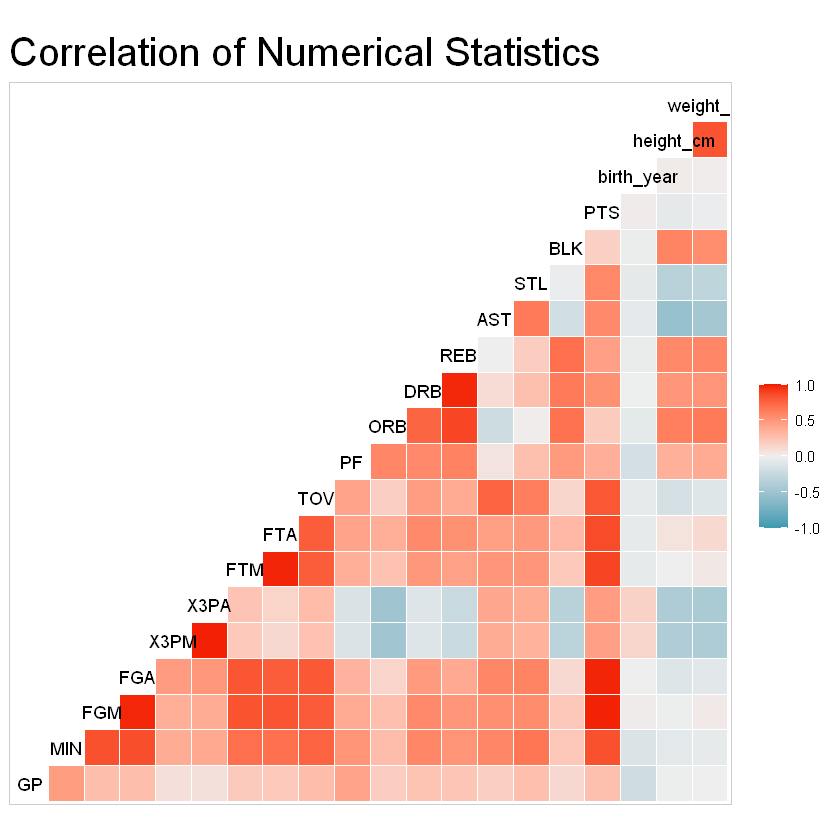

In [77]:
numbers <- NBA_data_filtered %>% select_if(is.numeric) 

# Drop draft_pick and draft_round columns that contain NA values. 
numbers_na <- numbers %>% select(which(colSums(is.na(.)) == 0))

corr_df <- ggcorr(numbers_na) + ggtitle('Correlation of Numerical Statistics') + theme(title = element_text(size=20))

corr_df



The correlation plot above gives us a many potential relationships that we can explore in the future. One interesting relationship that we will not explore further in this analysis is the fact that there is a weakly positive correlation between birth year. As birth years increase (which means the player is younger), the number of three pointers attempted and made increases. The influence of Stephen Curry and his amazing three point shooting may be influencing the younger generation  of players to shoot more three pointers. 

## Add this as a question not answered in this analysis (would need data before and after steph curry was named MVP, or data stating when stephen curry became popular). 

### Data Wrangling and Visualizations

In [129]:
# Set size of plot
options(repr.plot.width=10, repr.plot.height=10)
 
# Make new data frame with two seasons that had a shortened amount of games removed (NBA lockout year and pandemic year). 
df_country <- NBA_data_filtered %>% filter(NBA_data_filtered$Season != '2011 - 2012' & NBA_data_filtered$Season != '2019 - 2020')
# alter nationality column to be either 'United States' or 'International'
df_int <- df_country %>% mutate(nationality = ifelse(nationality != 'United States', 'International', nationality))
# Find out how many international and US players there are in each season. 
df_int_count <- df_int %>% group_by(Season) %>% count(nationality)

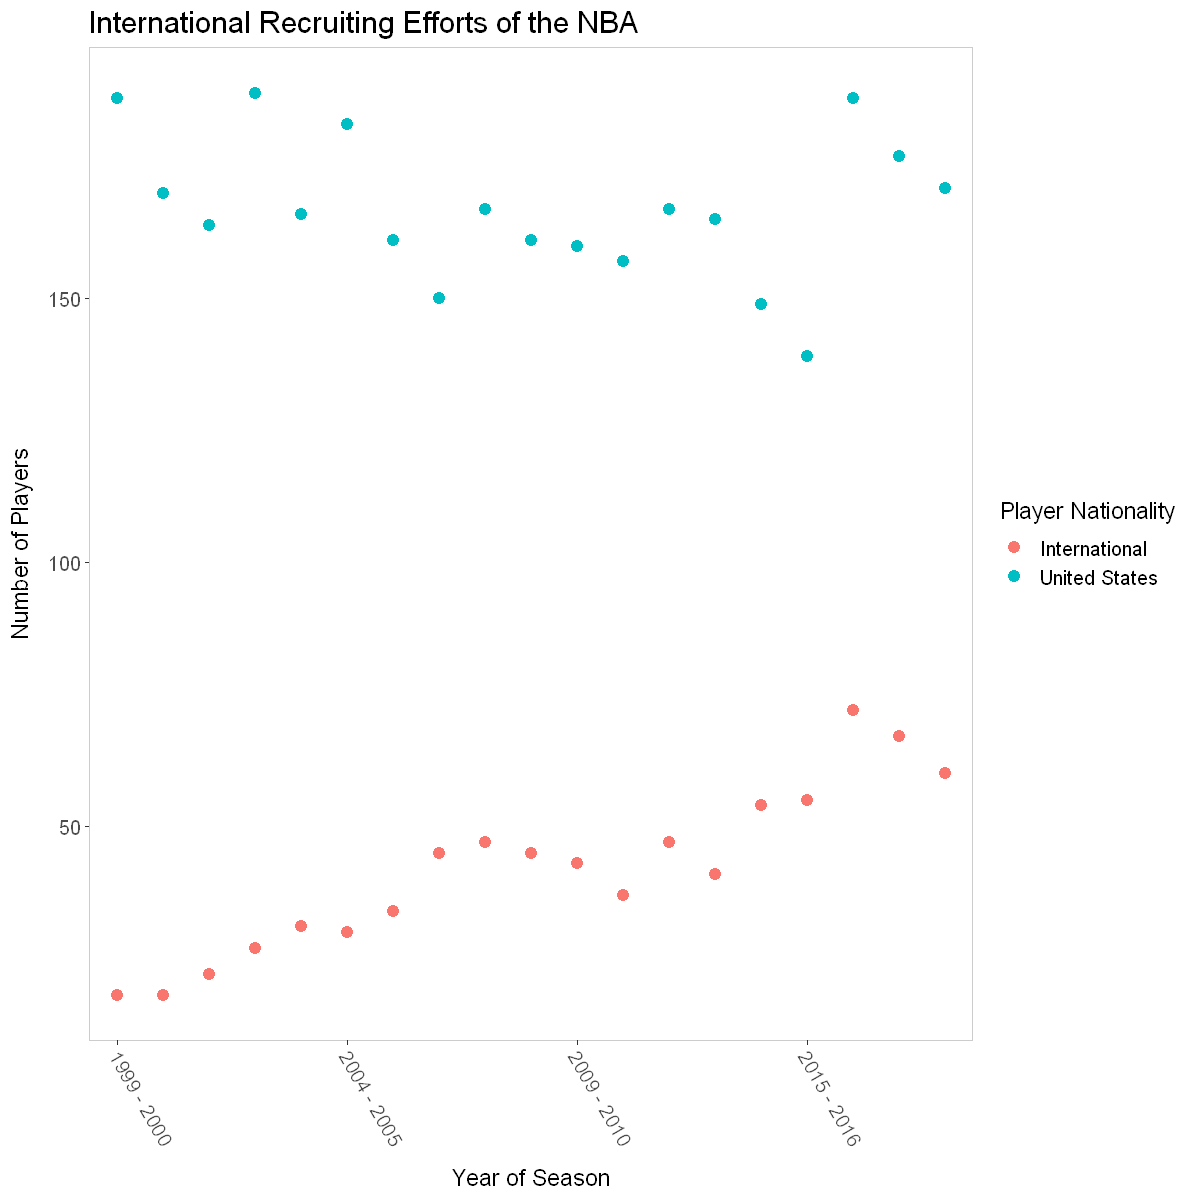

In [130]:
# Set variables for making the ticks marks on the x axis once every 10 years. 
end <- length(df_int_count$Season)
var <- df_int_count$Season
interval <- var[seq(1, end, by=10)]

# Create the plot
ggplot(df_int_count) + aes(x= Season, y= n, color= nationality) + geom_point(size=3) +
scale_x_discrete(breaks= interval, labels= interval) + 
theme(axis.text.x = element_text(angle=-60, hjust=-0.1, size=12), axis.text.y= element_text(size = 12),
     panel.grid.major = element_blank(), plot.title= element_text(size=18), axis.title.x= element_text(size=14),
     axis.title.y= element_text(size=14), legend.title= element_text(size=14), legend.text = element_text(size = 12))+
labs(x= "Year of Season", y="Number of Players", title= "International Recruiting Efforts of the NBA", color= "Player Nationality")


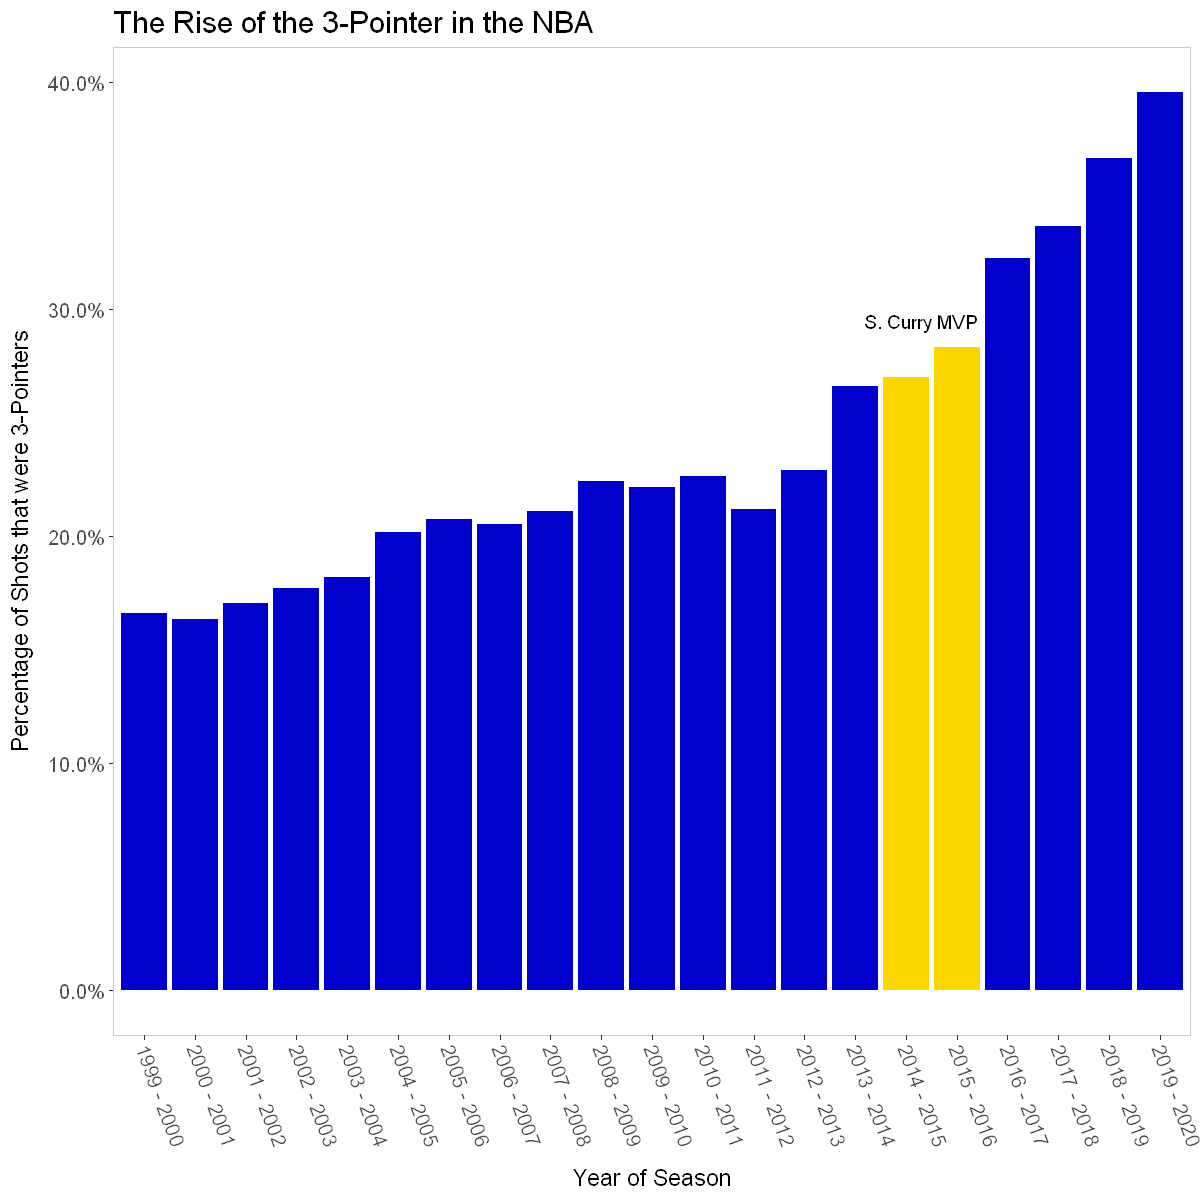

In [326]:
# Make new data frame to alter for this plot 
df_threes <- NBA_data_filtered 

df_3_ratio <- df_threes %>% group_by(Season) %>% mutate(X3PM_FGM_ratio = mean(X3PA/FGA))

df_3_ratio <- df_3_ratio %>% distinct(Season, X3PM_FGM_ratio)

# Create new columns with the Steph Curry MVP season rows to be highlighted as the only TRUE values. 
df_3_ratio$highlight <- FALSE
df_3_ratio$highlight[df_3_ratio$Season == '2014 - 2015' | df_3_ratio$Season == '2015 - 2016'] <- TRUE

#df_3_ratio
mvp_seasons <- c("2014 - 2015")
ggplot(df_3_ratio) + aes(x= Season, y= X3PM_FGM_ratio, fill= highlight) + 
    geom_col(show.legend=FALSE) +  
    theme(axis.text.x = element_text(angle=-70, hjust=-0.2, size=12), axis.text.y= element_text(size = 12),
     panel.grid.major = element_blank(), plot.title= element_text(size=18), axis.title.x= element_text(size=14),
     axis.title.y= element_text(size=14), legend.title= element_text(size=14), legend.text = element_text(size = 12))+
    labs(x= "Year of Season", y="Percentage of Shots that were 3-Pointers", title= "The Rise of the 3-Pointer in the NBA") + 
    scale_y_continuous(labels = scales::percent) + scale_fill_manual(values= c("blue3", "gold"))+
    annotate('text', label = 'S. Curry MVP', x = 16.3, y = 0.295, size=4)



In [4]:
year <- list()
age <- list()
for(i in 1:nrow(NBA_data_filtered)){
    current_year <- as.numeric(substring(NBA_data_filtered[i,2], 8,11))
    age[i] <- current_year - NBA_data_filtered$birth_year[i]
    year[i] <- current_year
}

NBA_data <-add_column(NBA_data_filtered,age = as.numeric(age),.after=22)
NBA_data <-add_column(NBA_data,year = as.numeric(year),.after=1)
head(NBA_data)

,League,year,Season,Stage,Player,Team,GP,MIN,FGM,FGA,...,birth_date,height,height_cm,weight,weight_kg,nationality,high_school,draft_round,draft_pick,draft_team
,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<int>,...,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<chr>
1,NBA,2000,1999 - 2000,Regular_Season,Shaquille O'Neal,LAL,79,3163,956,1665,...,06-Mar-72,01-Jul,216,325,147,United States,Robert G. Cole High School,1,1,Orlando Magic
2,NBA,2000,1999 - 2000,Regular_Season,Vince Carter,TOR,82,3126,788,1696,...,26-Jan-77,06-Jun,198,220,100,United States,Mainland High School,1,5,Golden State Warriors
3,NBA,2000,1999 - 2000,Regular_Season,Karl Malone,UTA,82,2947,752,1476,...,24-Jul-63,09-Jun,206,265,120,United States,Summerfield High School,1,13,Utah Jazz
4,NBA,2000,1999 - 2000,Regular_Season,Allen Iverson,PHI,70,2853,729,1733,...,07-Jun-75,6-0,183,165,75,United States,Bethel High School,1,1,Philadelphia Sixers
5,NBA,2000,1999 - 2000,Regular_Season,Gary Payton,SEA,82,3425,747,1666,...,23-Jul-68,04-Jun,193,180,82,United States,Skyline High School,1,2,Seattle SuperSonics
6,NBA,2000,1999 - 2000,Regular_Season,Jerry Stackhouse,DET,82,3148,619,1447,...,05-Nov-74,06-Jun,198,218,99,United States,Oak Hill Academy,1,3,Philadelphia Sixers


In [5]:
head(NBA_data %>% select(2,7:24))

,year,GP,MIN,FGM,FGA,X3PM,X3PA,FTM,FTA,TOV,PF,ORB,DRB,REB,AST,STL,BLK,PTS,age
,<dbl>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,2000,79,3163,956,1665,0,1,432,824,223,255,336,742,1078,299,36,239,2344,28
2,2000,82,3126,788,1696,95,236,436,551,178,263,150,326,476,322,110,92,2107,23
3,2000,82,2947,752,1476,2,8,589,739,231,229,169,610,779,304,79,71,2095,37
4,2000,70,2853,729,1733,89,261,442,620,230,162,71,196,267,328,144,5,1989,25
5,2000,82,3425,747,1666,177,520,311,423,224,178,100,429,529,732,153,18,1982,32
6,2000,82,3148,619,1447,83,288,618,758,311,188,118,197,315,365,103,36,1939,26


In [6]:
NBA_grouped_age <- subset(NBA_data,select=c(2,7:24)) %>% group_by(age) %>% summarize(across(everything(), mean)) %>% mutate_at(vars(-age), funs(round(., 1)))
NBA_grouped_age

`summarise()` ungrouping output (override with `.groups` argument)

Warning message:
"`funs()` is deprecated as of dplyr 0.8.0.
Please use a list of either functions or lambdas: 

  # Simple named list: 
  list(mean = mean, median = median)

  # Auto named with `tibble::lst()`: 
  tibble::lst(mean, median)

  # Using lambdas
  list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated."


age,year,GP,MIN,FGM,FGA,X3PM,X3PA,FTM,FTA,TOV,PF,ORB,DRB,REB,AST,STL,BLK,PTS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
20,2011.6,75.0,1836.6,277.8,635.0,47.2,143.9,139.4,193.3,115.0,160.0,90.3,233.9,324.2,129.8,51.4,48.6,742.2
21,2011.2,75.7,1945.2,308.3,679.2,47.9,142.0,155.0,212.7,124.0,174.6,102.1,259.7,361.8,162.1,63.9,48.5,819.4
22,2011.0,74.8,1934.0,316.4,688.8,49.2,142.5,158.4,213.8,120.2,172.2,99.3,257.7,357.0,166.5,61.6,45.4,840.3
23,2010.2,75.0,1993.4,328.0,714.7,52.2,150.1,164.9,220.9,123.8,172.6,99.6,268.2,367.8,186.9,66.1,43.0,873.1
24,2010.1,75.5,1976.8,324.8,704.5,55.4,156.4,161.3,214.6,117.6,171.0,95.3,256.8,352.2,178.8,65.1,41.9,866.3
25,2010.3,75.0,2031.4,335.8,727.7,60.9,169.9,169.2,222.7,118.7,171.7,96.9,266.0,362.9,182.6,65.5,42.1,901.7
26,2010.0,75.3,2046.4,336.0,729.6,62.5,172.4,174.5,227.0,118.9,170.5,98.2,271.7,369.9,185.1,65.4,41.9,909.1
27,2010.2,75.0,2071.6,337.5,733.2,65.3,178.1,167.7,217.2,117.8,171.3,94.6,270.8,365.3,192.0,65.2,41.9,908.1
28,2010.2,75.6,2090.8,345.1,751.8,67.2,184.5,173.6,225.3,120.4,171.6,92.9,269.8,362.7,199.3,65.0,42.2,931.0


In [15]:
NBA_grouped_year <- subset(NBA_data,select=c(2,7:24,29)) %>% group_by(year) %>% summarize(across(everything(), mean)) %>% mutate_at(vars(-year), funs(round(., 1)))
NBA_grouped_year

`summarise()` ungrouping output (override with `.groups` argument)



year,GP,MIN,FGM,FGA,X3PM,X3PA,FTM,FTA,TOV,PF,ORB,DRB,REB,AST,STL,BLK,PTS,age,height_cm
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2000,77.3,2096.2,331.3,728.7,44.1,122.5,172.8,228.2,130.5,195.0,106.6,268.8,375.3,201.3,69.6,45.4,879.4,28.8,200.5
2001,77.3,2175.2,338.9,755.1,46.6,130.6,181.1,240.2,131.2,190.6,107.4,279.5,386.9,204.7,70.1,47.9,905.6,28.5,201.0
2002,76.9,2159.0,332.1,733.0,49.4,135.9,168.3,221.9,122.2,181.8,110.0,275.4,385.4,201.1,69.4,49.0,881.8,28.1,201.1
2003,76.6,2078.5,314.6,705.3,45.4,129.3,165.6,216.5,121.5,180.6,102.3,263.9,366.2,188.8,69.1,42.7,840.3,28.3,201.6
2004,76.5,2136.2,318.2,715.6,47.8,136.8,167.8,222.0,125.4,180.3,106.3,271.4,377.8,192.2,70.1,46.6,851.9,27.8,201.5
2005,75.2,2020.0,308.6,683.5,51.0,141.2,171.2,223.6,113.6,178.3,98.9,248.6,347.5,183.7,63.1,39.8,839.5,28.0,200.4
2006,76.4,2163.7,330.9,725.4,56.8,155.6,183.7,242.0,121.5,188.3,93.6,262.8,356.4,192.8,63.7,38.5,902.3,27.6,200.5
2007,76.1,2079.0,319.2,690.7,54.0,148.4,171.7,227.3,124.7,184.2,92.7,257.6,350.3,188.6,62.4,39.7,864.1,27.6,200.7
2008,76.3,2060.9,329.4,710.2,58.8,159.5,168.5,220.5,113.5,172.0,96.3,266.6,362.9,186.0,62.4,41.3,886.1,27.5,201.2


In [8]:
NBA_grouped_draftpick <- subset(NBA_data,select=c(2,7:24,35)) %>% group_by(draft_pick) %>% summarize(across(everything(), mean)) %>% mutate_at(vars(-draft_pick), funs(round(., 1)))
NBA_grouped_draftpick

`summarise()` ungrouping output (override with `.groups` argument)



draft_pick,year,GP,MIN,FGM,FGA,X3PM,X3PA,FTM,FTA,TOV,PF,ORB,DRB,REB,AST,STL,BLK,PTS,age
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2009.1,75.0,2395.7,477.6,970.4,40.2,115.4,268.9,376.7,165.1,190.6,142.2,396.5,538.8,228.1,70.4,80.0,1264.3,27.6
2,2009.3,75.8,2247.3,375.0,806.3,57.4,160.0,193.9,253.0,138.7,175.0,114.3,325.5,439.8,230.9,72.0,55.6,1001.3,28.0
3,2010.1,75.4,2256.0,398.2,859.0,75.2,204.4,225.5,283.7,143.1,180.3,104.3,308.0,412.4,231.5,66.5,48.8,1097.1,27.2
4,2009.7,75.1,2194.3,363.5,804.3,63.7,185.8,196.7,256.3,133.3,173.2,97.5,298.9,396.4,243.3,74.4,42.0,987.3,27.3
5,2010.4,75.9,2181.9,365.7,793.2,64.8,179.4,194.2,255.1,134.5,186.9,109.4,321.6,431.0,213.4,72.1,46.0,990.4,28.2
6,2010.7,75.0,2046.9,337.4,730.0,72.0,195.2,156.4,204.9,113.6,172.7,105.0,284.2,389.2,164.5,60.9,43.2,903.2,26.7
7,2010.1,75.3,2040.0,327.6,725.2,72.1,196.7,149.6,194.9,118.9,175.8,88.2,251.6,339.8,186.9,64.3,37.0,876.9,26.7
8,2010.5,75.5,2021.8,308.7,702.0,65.4,187.9,142.9,183.6,115.5,163.4,78.3,231.9,310.2,197.6,65.5,36.0,825.8,27.3
9,2010.2,75.6,2198.9,370.7,804.0,64.9,181.3,204.4,264.2,123.3,170.1,104.9,323.4,428.3,202.8,69.9,49.8,1010.8,27.4


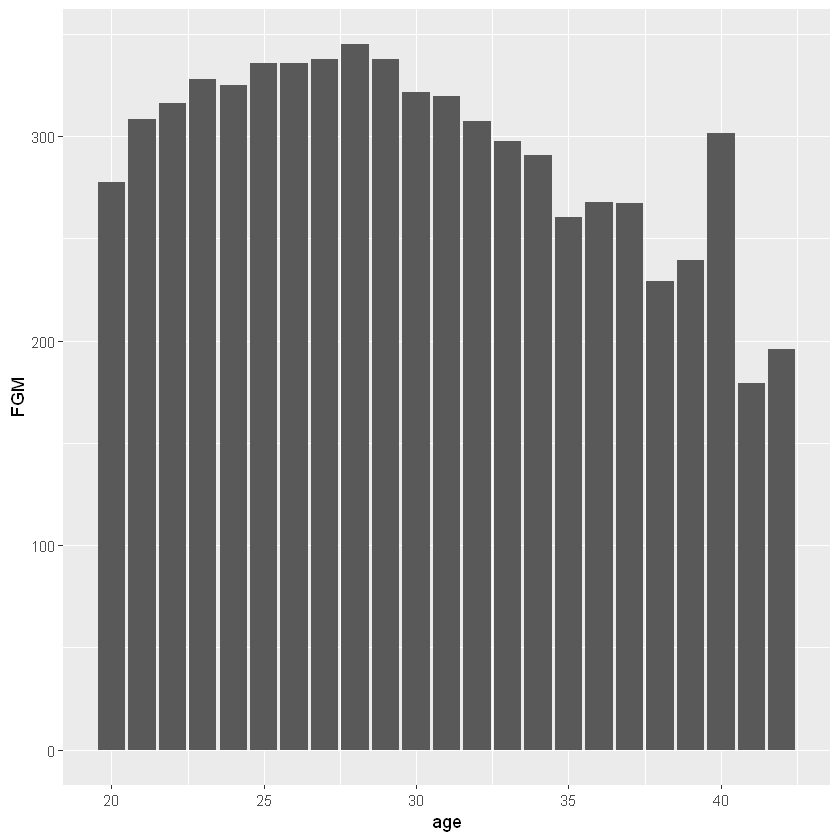

In [10]:
ggplot(NBA_grouped_age) + aes(x = age, y = FGM) + geom_col()

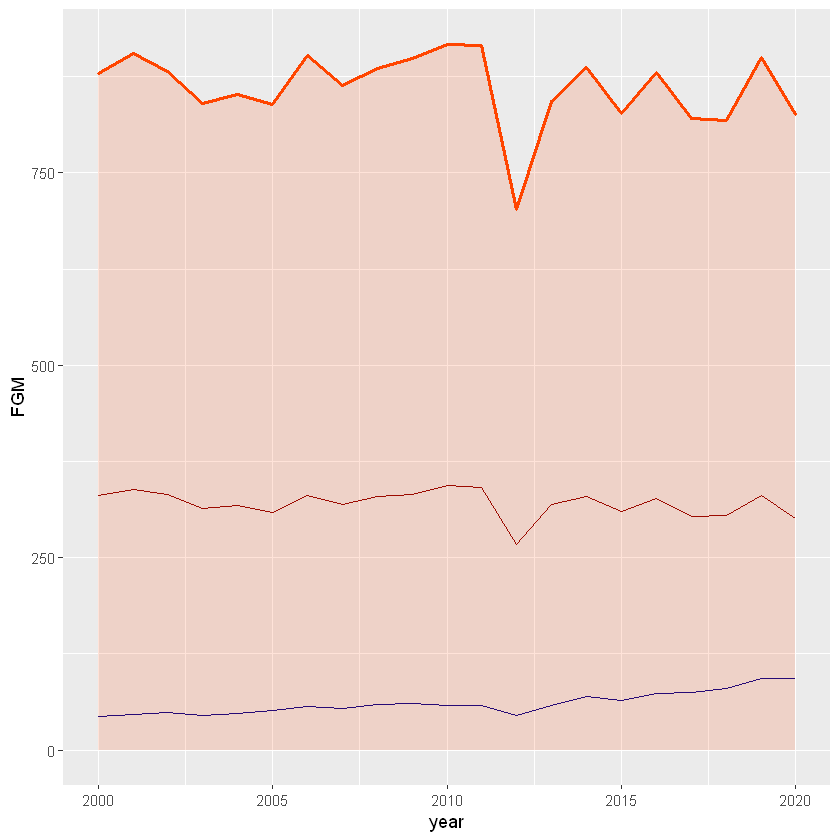

In [39]:
ggplot(NBA_grouped_year, aes(x = year)) + 
    geom_line(aes(y = FGM), color = 'darkred') +
    geom_line(aes(y = X3PM), color = 'darkblue') + 
    geom_area(aes(y = PTS), fill = 'orangered', color ='orangered', size = 1,alpha = 0.15) 

Warning message:
"Removed 1 row(s) containing missing values (geom_path)."
Warning message:
"Removed 1 row(s) containing missing values (geom_path)."


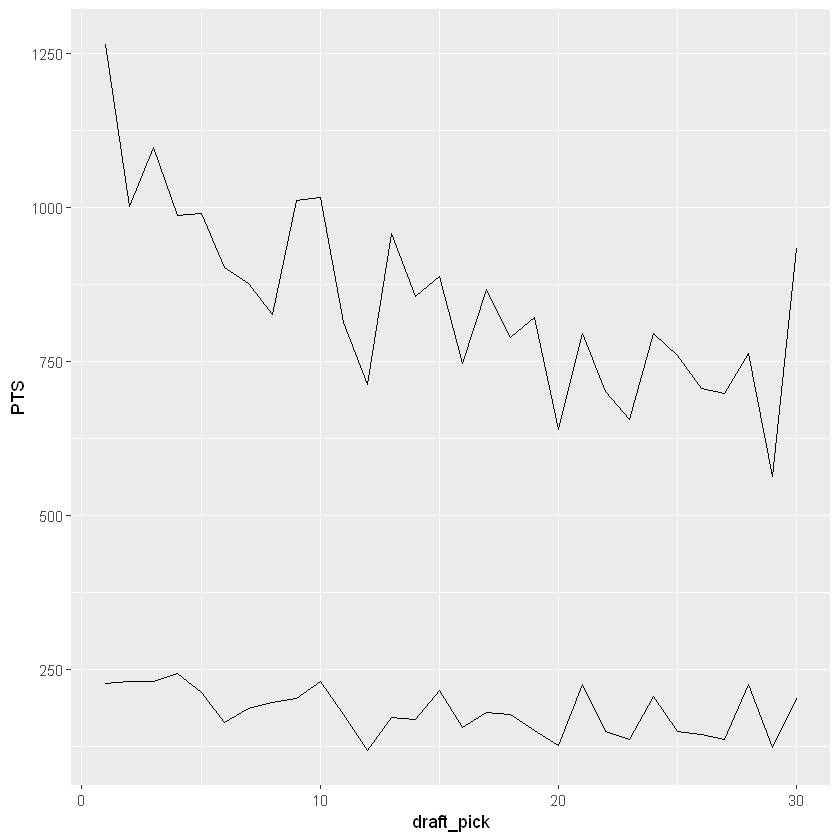

In [54]:
ggplot(NBA_grouped_draftpick, aes(x = draft_pick)) + geom_line(aes(y = PTS)) + geom_line(aes(y = AST))

In [12]:
names(select_if(NBA_data))

ERROR: Error in is_logical(.predicate): argument ".predicate" is missing, with no default
